In [1]:
import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import modules.cleaning as cleaning
import modules.util as util
import modules.barplot_percentage_vs_size as barplot_percentage_vs_size
import modules.line_percentage_plot_vs_time as line_percentage_plot_vs_time
import modules.column_value_count_H as column_value_count_H

In [2]:
# Graph configuration
plt.rcParams['figure.figsize'] = (10, 8)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

sns.set(context = 'talk', style='white')

In [3]:
merged_df=cleaning.get_cleaned_df()

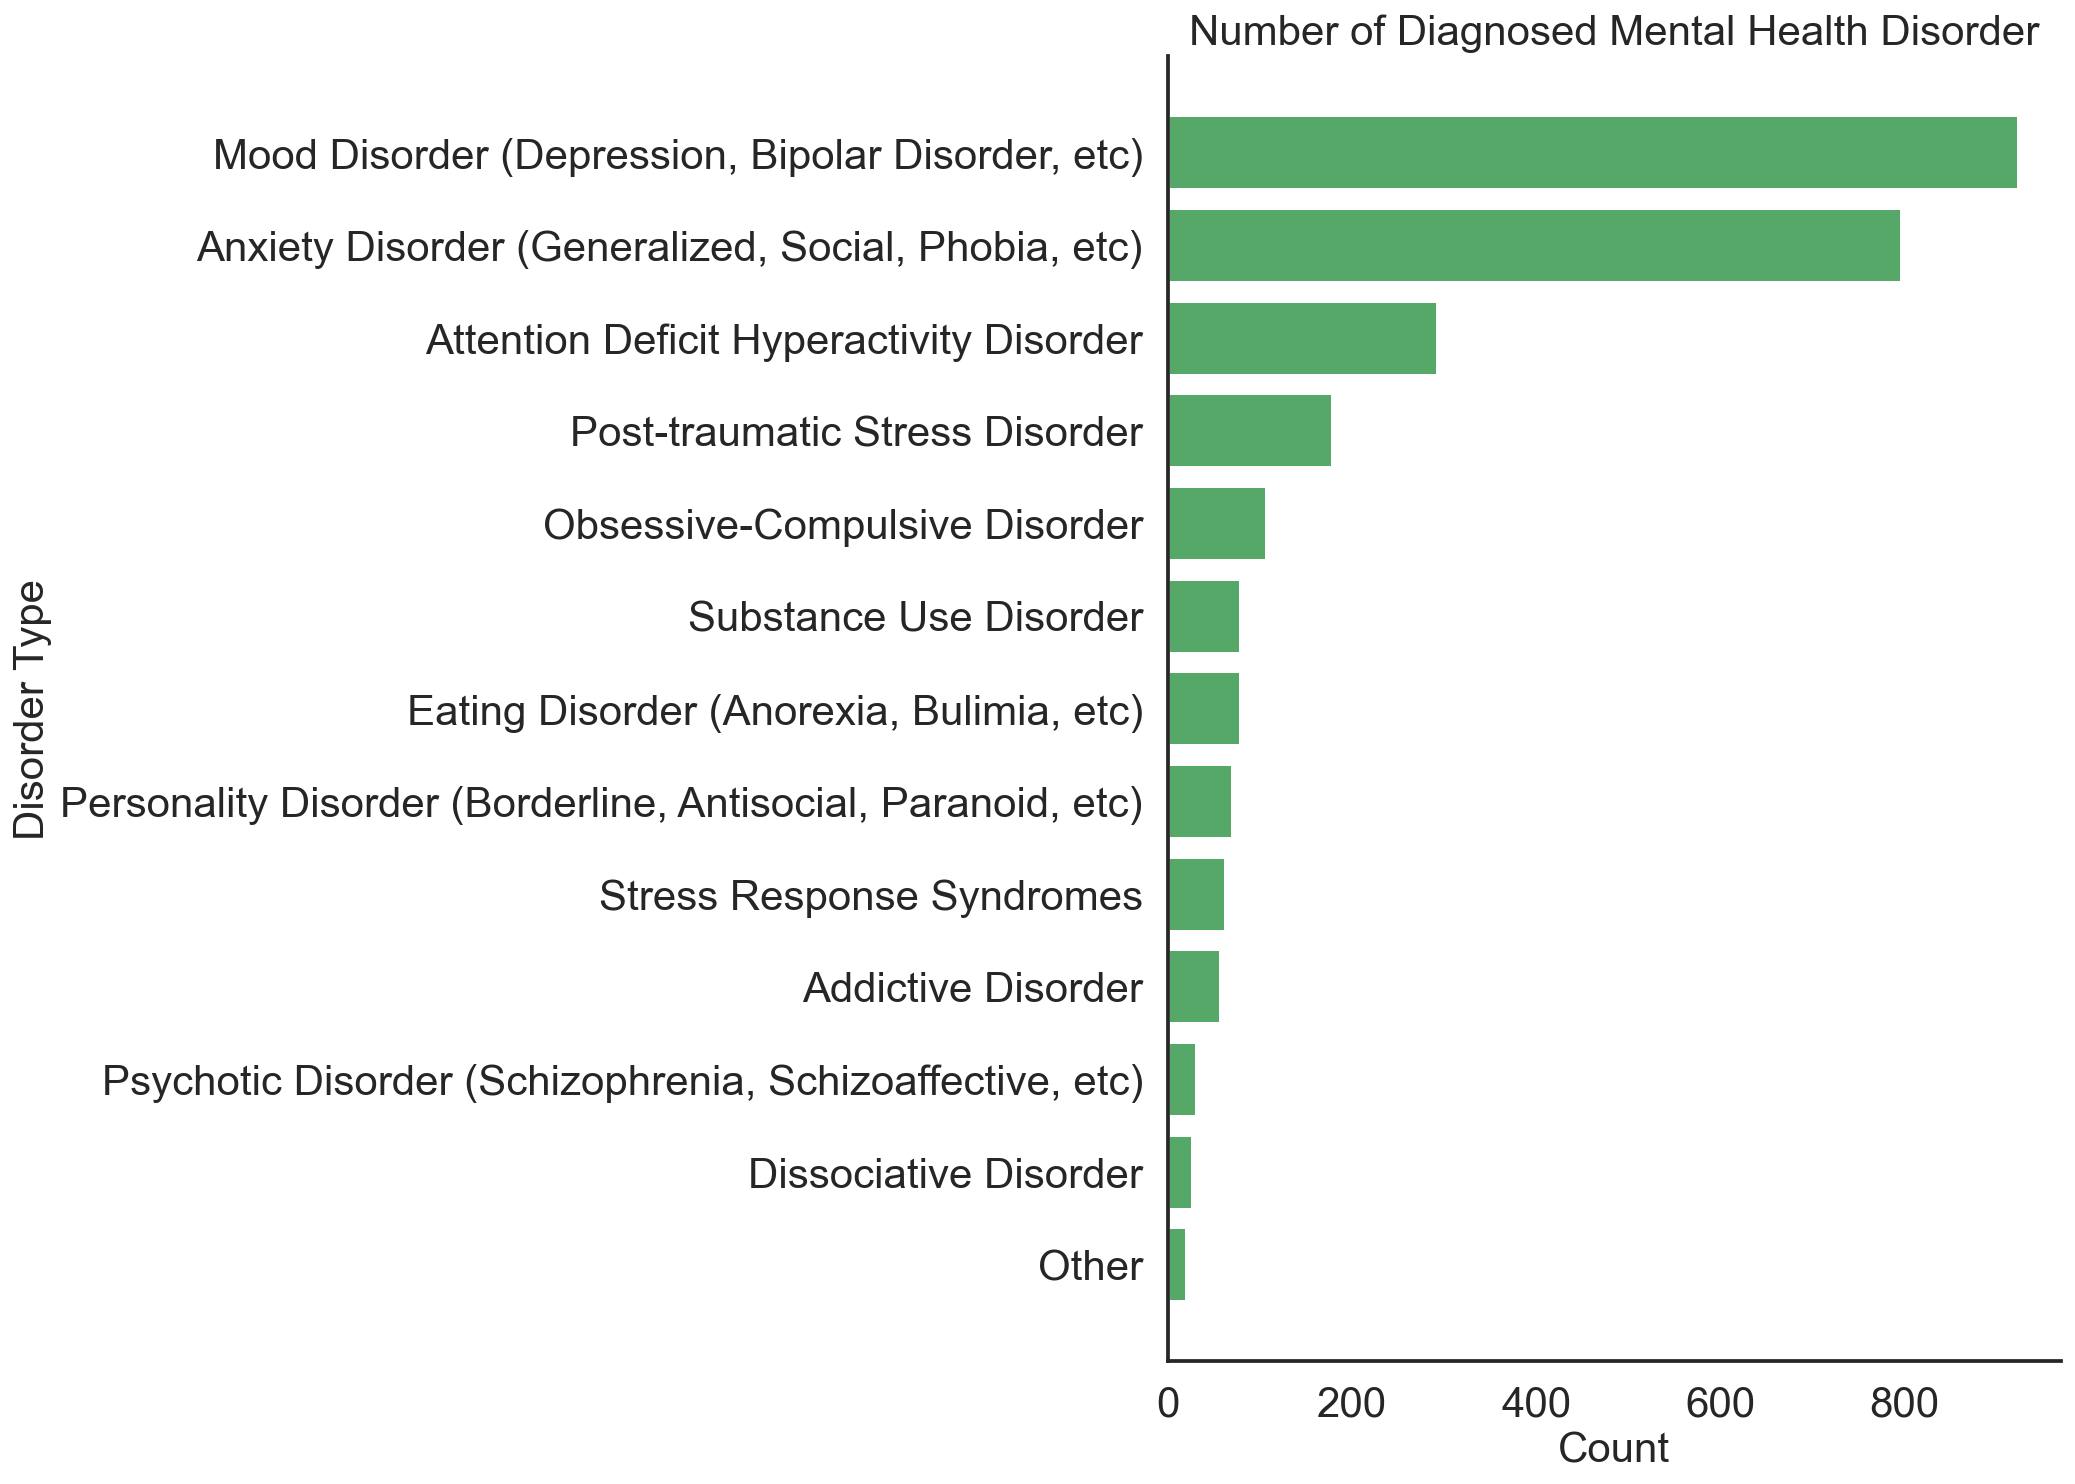

In [4]:
y_name='Disorder Type'
x_name='Count'
p_title='Number of Diagnosed Mental Health Disorder'
column_value_count_H.v_count_plot(cleaning.to_1D(merged_df['diagnosed_mh_disorder']),y_name,x_name,p_title)

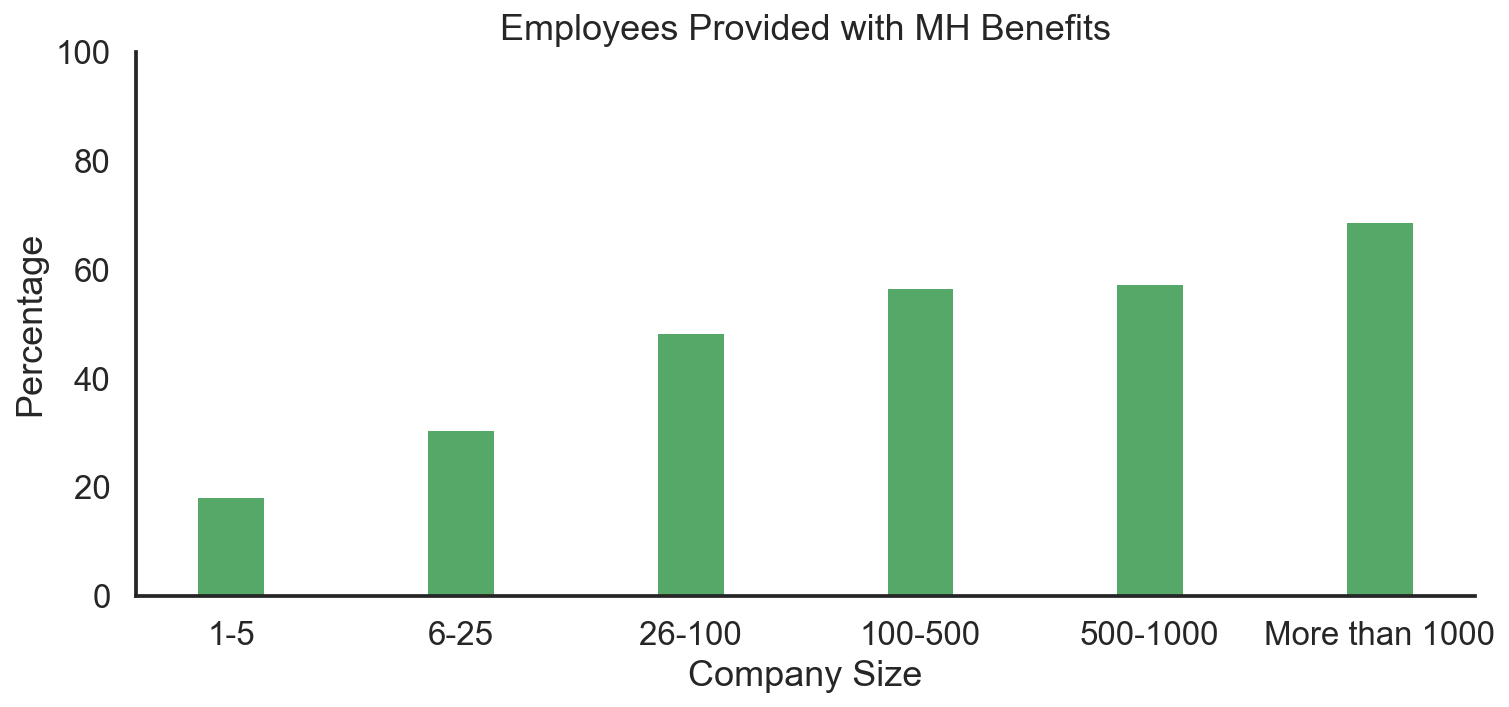

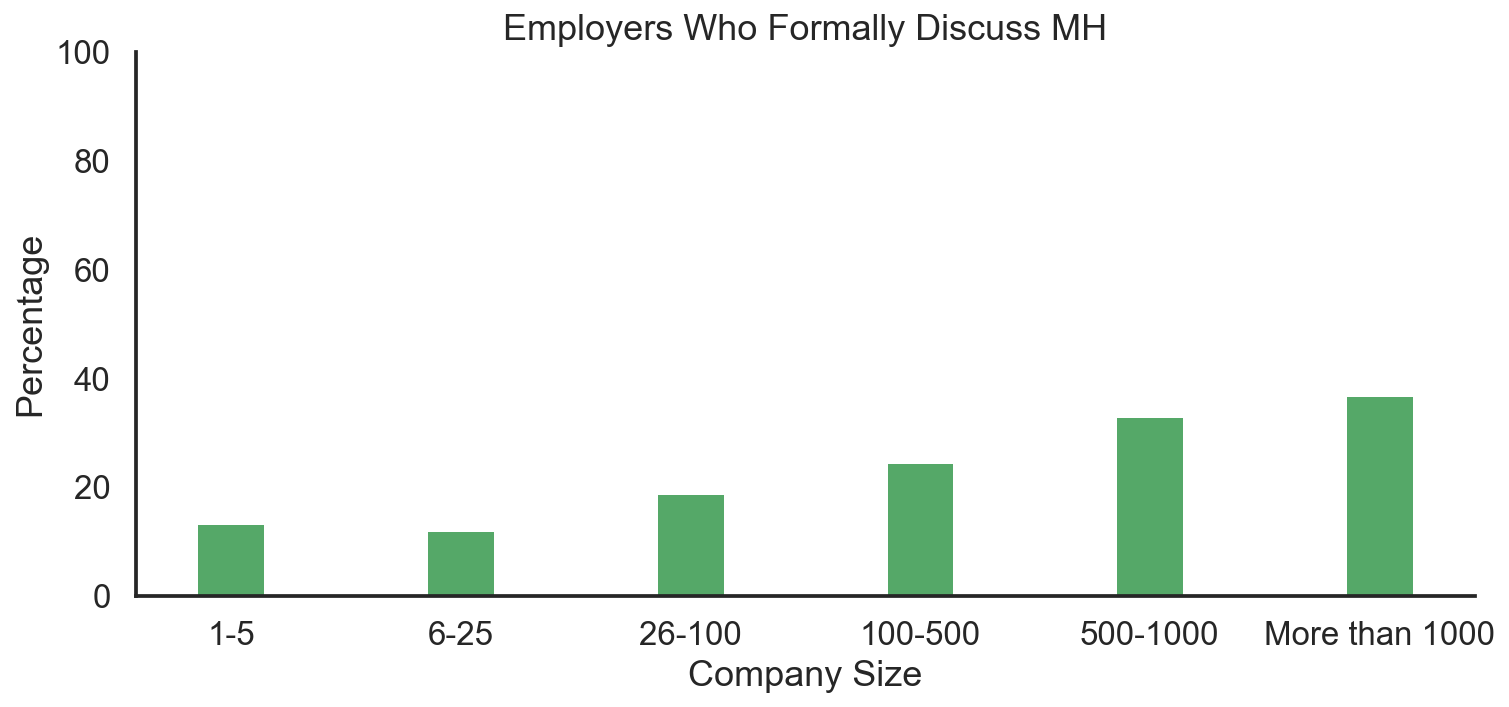

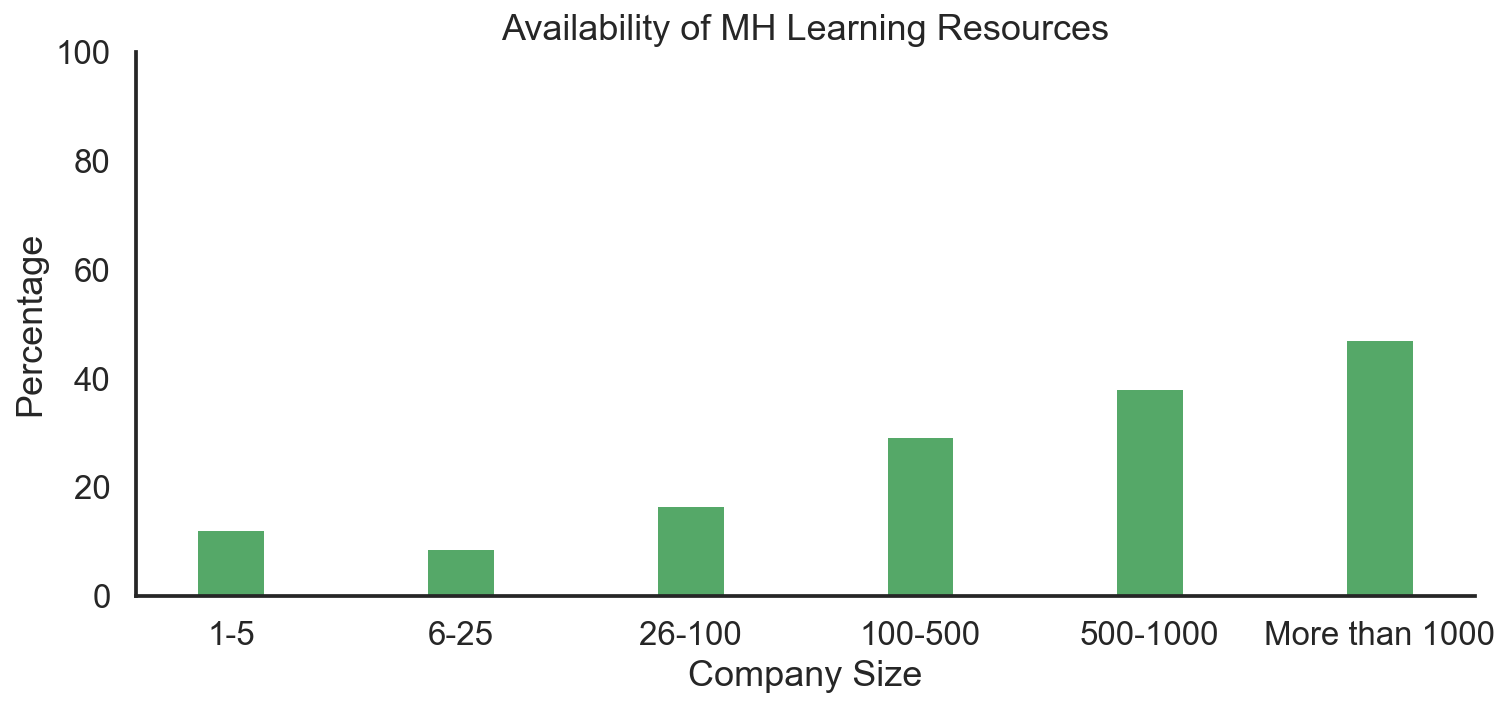

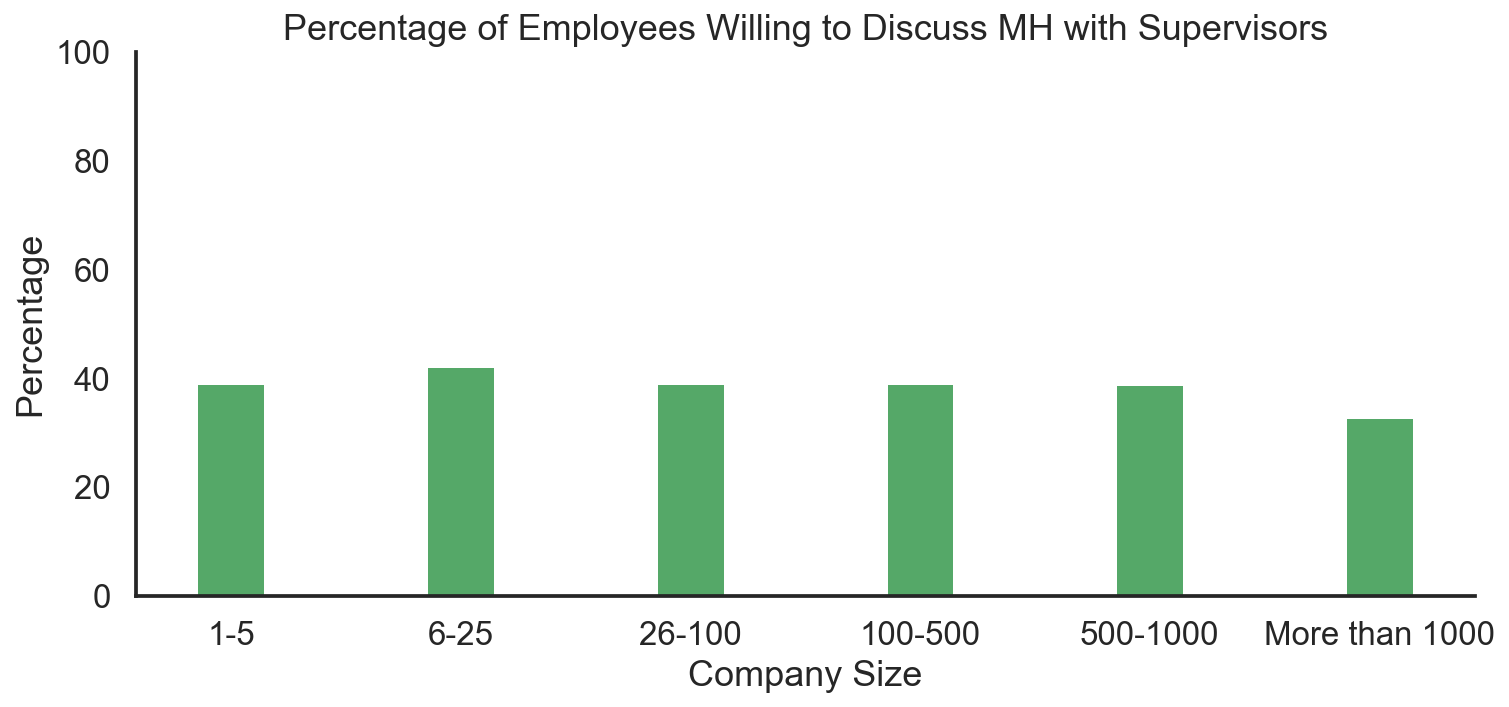

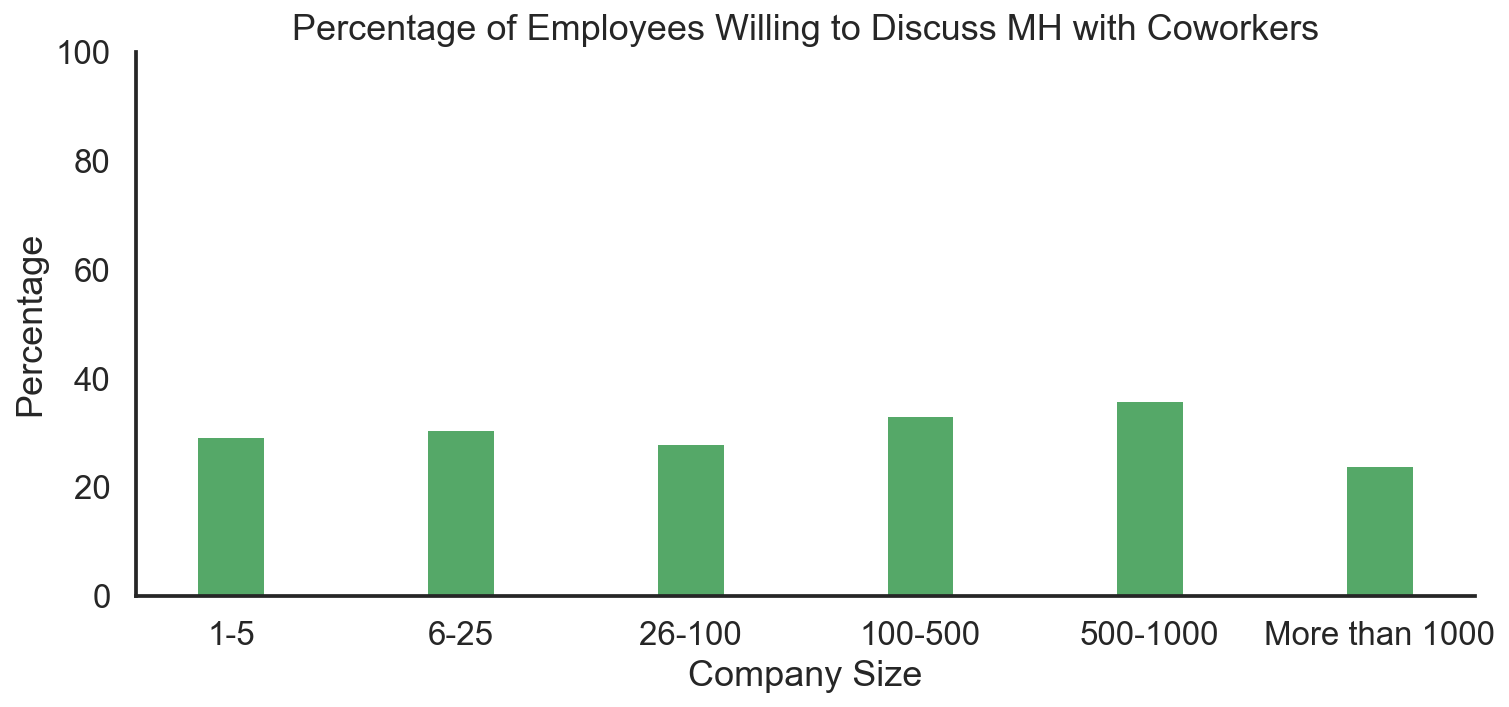

In [5]:
types = ['provide_mh_benefits', 
         'formal_discuss_mh', 
         'offer_mh_learning_resources',
         'discuss_mh_with_supervisor', 
         'discuss_mh_with_coworkers']
titles = ["Employees Provided with MH Benefits",
          "Employers Who Formally Discuss MH",
          "Availability of MH Learning Resources",
          "Percentage of Employees Willing to Discuss MH with Supervisors",
          "Percentage of Employees Willing to Discuss MH with Coworkers"]

tmp_merged_df = merged_df[merged_df.is_tech_company == 1]
for i in range(len(types)):
    input_df = tmp_merged_df[['employee_count',types[i]]]
    barplot_percentage_vs_size.bar_percent_wrt_company_size(input_df,types[i],2,titles[i])
    #plt.savefig(types[i]+'_vs_size.png',transparent=True,bbox_inches='tight')

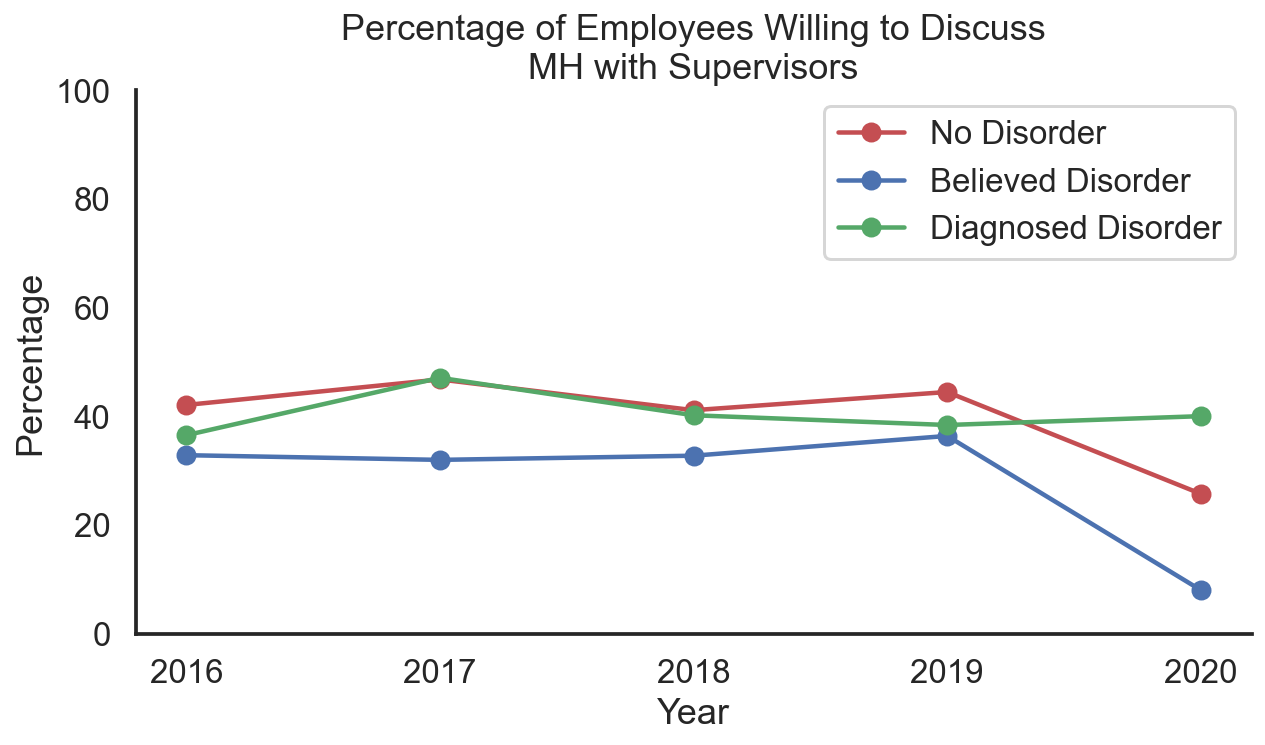

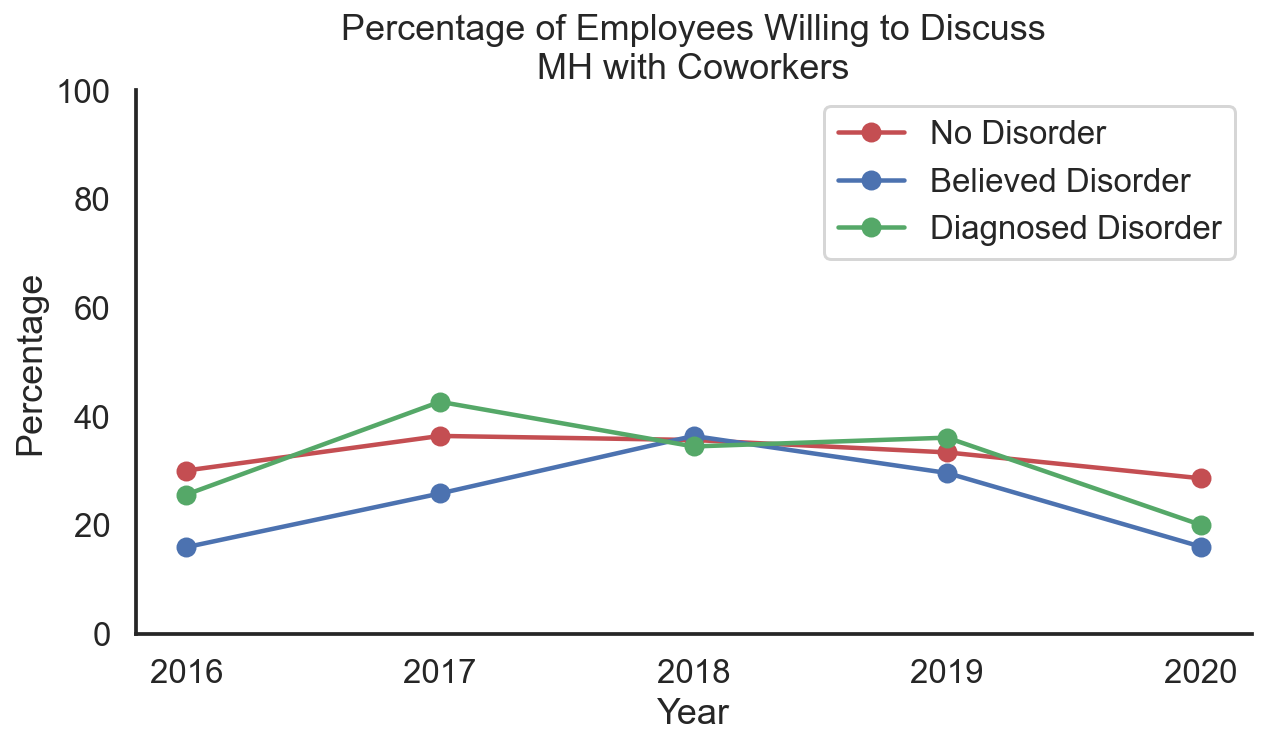

In [6]:
attitude = ['discuss_mh_with_supervisor', 'discuss_mh_with_coworkers']
types = ['No Disorder', 'Believed Disorder', 'Diagnosed Disorder']
title_names = ['Supervisors', 'Coworkers']

tmp_merged_df = merged_df[merged_df.is_tech_company == 1]
input_df=tmp_merged_df[['discuss_mh_with_supervisor', 'discuss_mh_with_coworkers','year','has_mh_disorder']]
for i in range(2):
    line_percentage_plot_vs_time.line_plot_time_vs_multi_var(input_df,'has_mh_disorder',attitude[i],[0,2,3],2,types)
    plt.title("Percentage of Employees Willing to Discuss\nMH with {}".format(title_names[i]))
    #plt.savefig('attitude{}.png'.format(i),transparent=True,bbox_inches='tight')

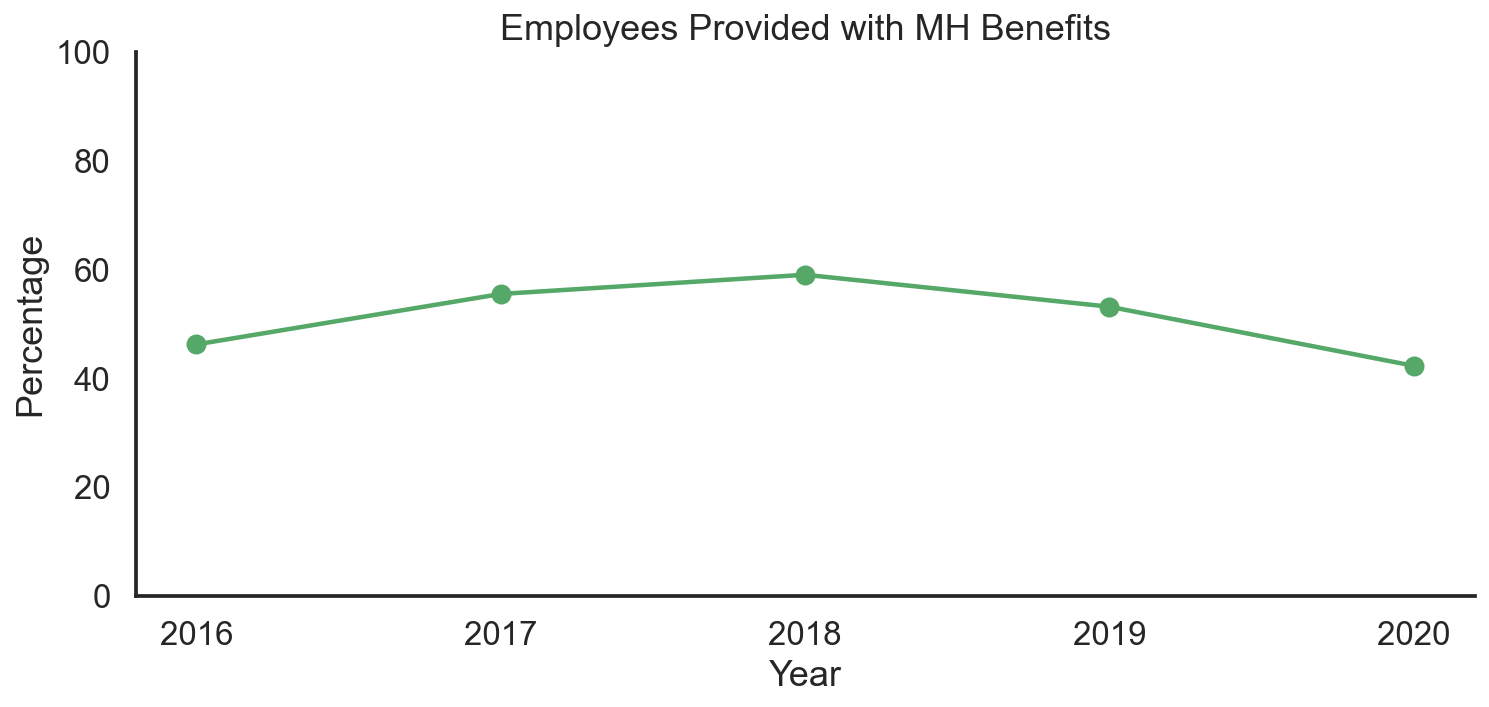

In [7]:
provide_mh_benefits = tmp_merged_df.loc[(merged_df['is_tech_company']==1)&(merged_df['provide_mh_benefits']!= -1), ['year', 'provide_mh_benefits']]
year = ['2016', '2017', '2018', '2019', '2020']
x = np.arange(5)
sample_num = provide_mh_benefits.groupby('year').size()
yes_benefits = provide_mh_benefits[provide_mh_benefits.provide_mh_benefits == 2].groupby('year').size()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(x, yes_benefits.values / sample_num.values * 100, 'go-')
plt.xticks(x, year)
ax.set_ylim([0, 100])
sns.despine()
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title("Employees Provided with MH Benefits");
#plt.savefig('timetrend.png'.format(i),transparent=True,bbox_inches='tight')

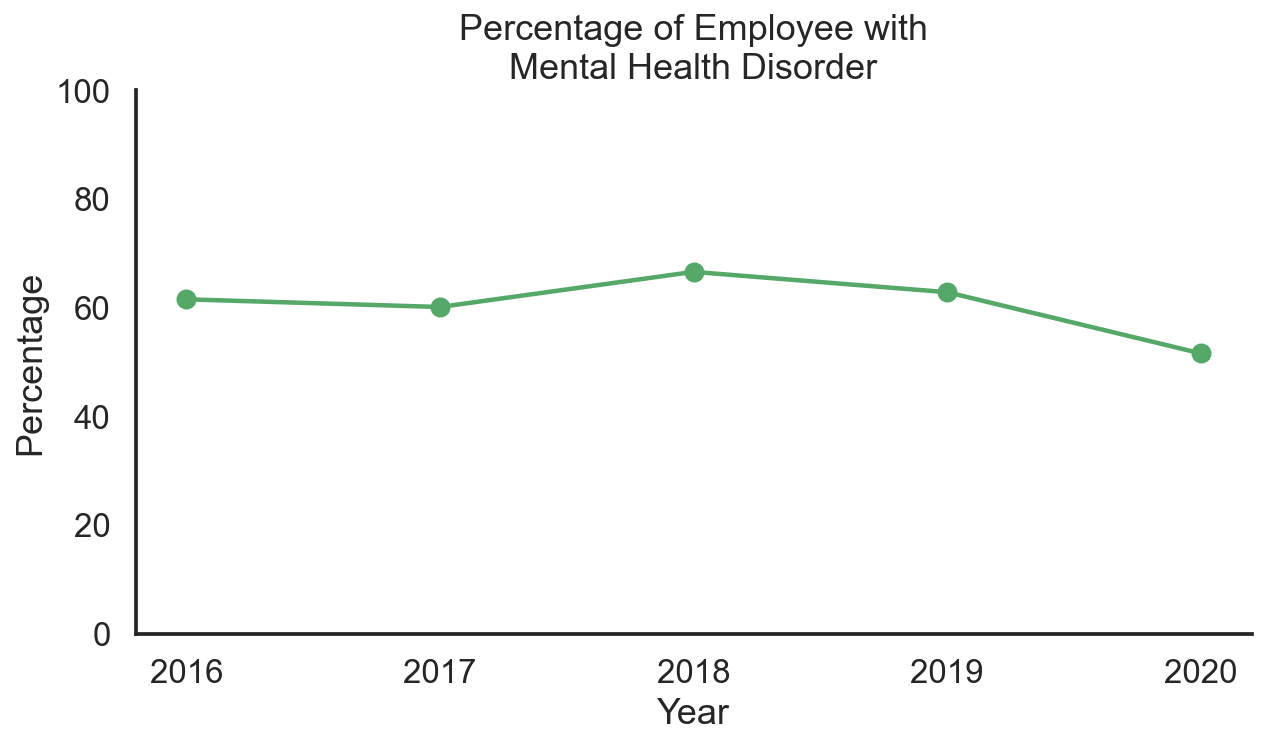

In [8]:
has_mh_disorder = merged_df.loc[(merged_df['is_tech_company']==1)&(merged_df['has_mh_disorder']!= -1), ['year', 'has_mh_disorder']]
sample_num = has_mh_disorder.groupby('year').size()
has = has_mh_disorder[has_mh_disorder.has_mh_disorder == 2].groupby('year').size()
has2 = has_mh_disorder[has_mh_disorder.has_mh_disorder == 3].groupby('year').size()
has = (has.values+has2.values)/sample_num.values *100
title = "Percentage of Employee with\nMental Health Disorder"
util.line_graph(has, title)

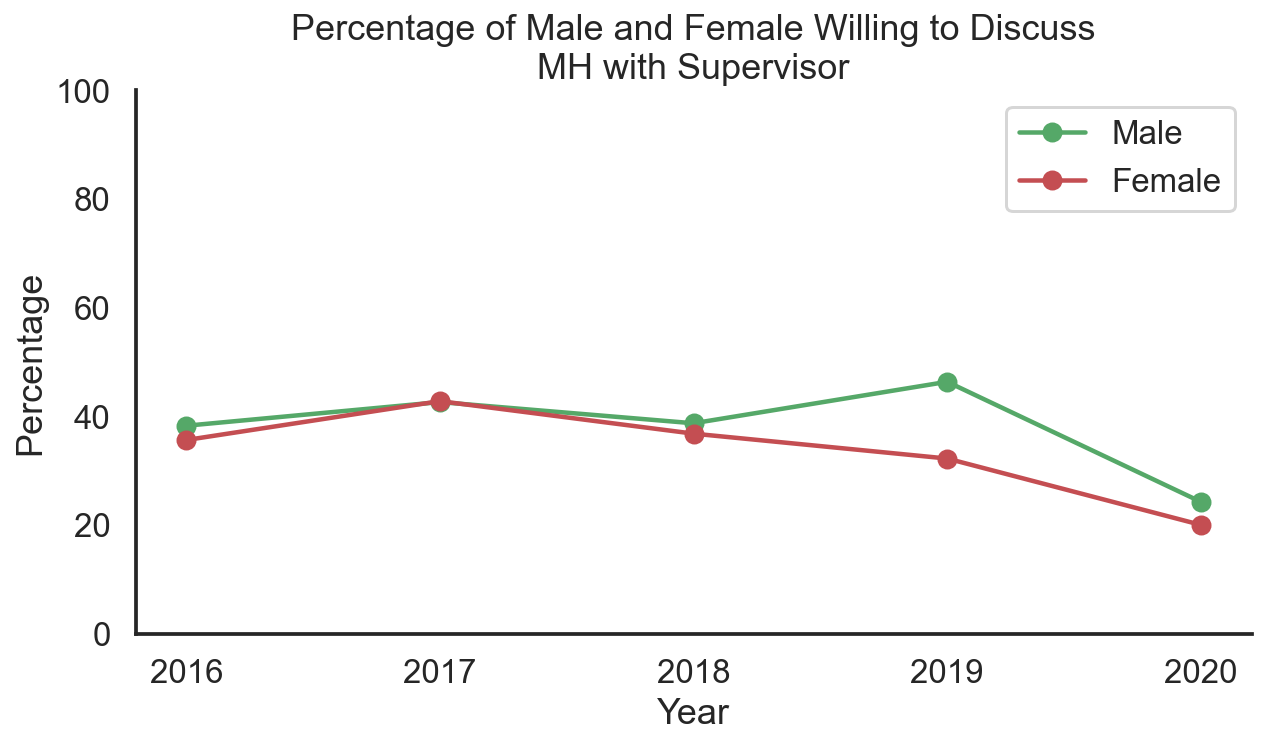

In [9]:
discuss_supervisor_male = merged_df.loc[(merged_df['is_tech_company']==1)&(merged_df['discuss_mh_with_supervisor']!= -1)&(merged_df['gender'] == 0), ['year', 'discuss_mh_with_supervisor']]
discuss_supervisor_female = merged_df.loc[(merged_df['is_tech_company']==1)&(merged_df['discuss_mh_with_supervisor']!= -1)&(merged_df['gender'] == 1), ['year', 'discuss_mh_with_supervisor']]
sample_num_male = discuss_supervisor_male.groupby('year').size()
sample_num_female = discuss_supervisor_female.groupby('year').size()
male = discuss_supervisor_male[discuss_supervisor_male.discuss_mh_with_supervisor == 2].groupby('year').size()
female = discuss_supervisor_female[discuss_supervisor_female.discuss_mh_with_supervisor == 2].groupby('year').size()
discuss_supervisor_female = female.values/sample_num_female.values*100
discuss_supervisor_male = male.values/sample_num_male.values*100
year = [2016,2017,2018,2019,2020]
title = "Percentage of Male and Female Willing to Discuss\nMH with Supervisor"
util.line_graph_double(discuss_supervisor_male,discuss_supervisor_female,'Male','Female', title)

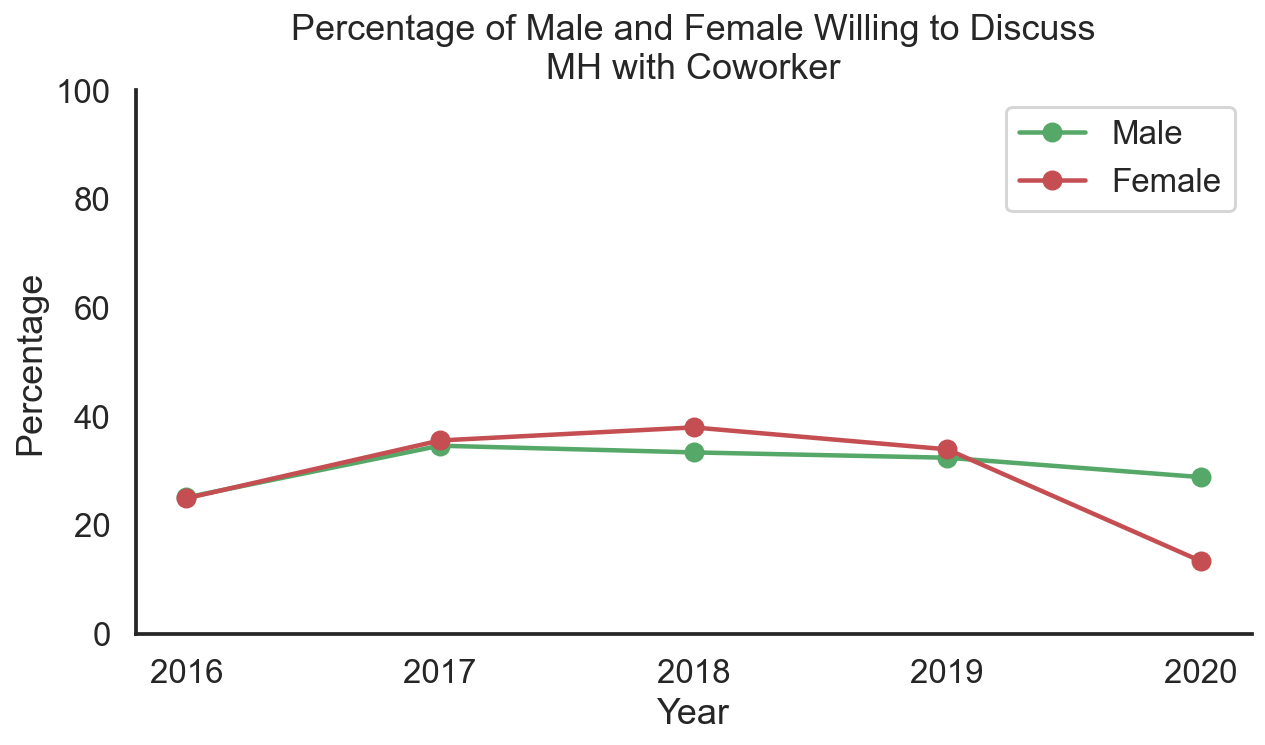

In [10]:
discuss_coworker_male = merged_df.loc[(merged_df['is_tech_company']==1)&(merged_df['discuss_mh_with_coworkers']!= -1)&(merged_df['gender'] == 0), ['year', 'discuss_mh_with_coworkers']]
discuss_coworker_female = merged_df.loc[(merged_df['is_tech_company']==1)&(merged_df['discuss_mh_with_coworkers']!= -1)&(merged_df['gender'] == 1), ['year', 'discuss_mh_with_coworkers']]
sample_num_male = discuss_coworker_male.groupby('year').size()
sample_num_female = discuss_coworker_female.groupby('year').size()
male = discuss_coworker_male[discuss_coworker_male.discuss_mh_with_coworkers == 2].groupby('year').size()
female = discuss_coworker_female[discuss_coworker_female.discuss_mh_with_coworkers == 2].groupby('year').size()
discuss_coworkers_female = female.values/sample_num_female.values*100
discuss_coworkers_male = male.values/sample_num_male.values*100
title = "Percentage of Male and Female Willing to Discuss\nMH with Coworker"
util.line_graph_double(discuss_coworkers_male,discuss_coworkers_female,'Male','Female', title)